In [1]:
import sys
import numpy as np
import matplotlib.pyplot as pl
!{sys.executable} -m pip install progressbar2
!{sys.executable} -m pip install pydub
import pydub

from core.util import ico_noise_cancellation

In [2]:
scale = 1.25        # scales distances in coordinate system by this factor
T_max = 5
lr = 1e-7
inputs = ["firetruck.mp3"]

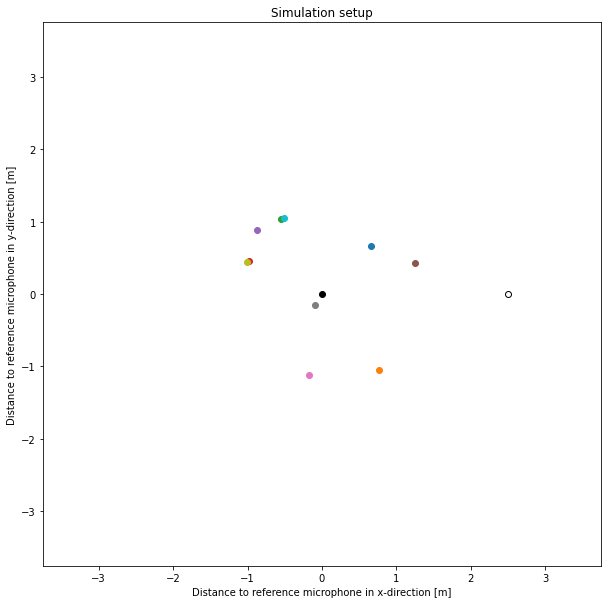

100% (719832 of 719832) |################| Elapsed Time: 0:00:17 Time:  0:00:17


Sample delays:
 [[-38 -33  51  71  69 -83  27   7  73  48]]
Learned weights:
 [ 1.90134548e-01  1.82671465e-01  6.17518374e-08  3.20862451e-06
 -1.83784127e-06  2.80896737e-01  3.33454117e-09 -2.42956463e-08
 -1.81096666e-06 -1.48909591e-08]
Noise: -0.00016806499249094348
Mean noise reduction: 93.47953078349106


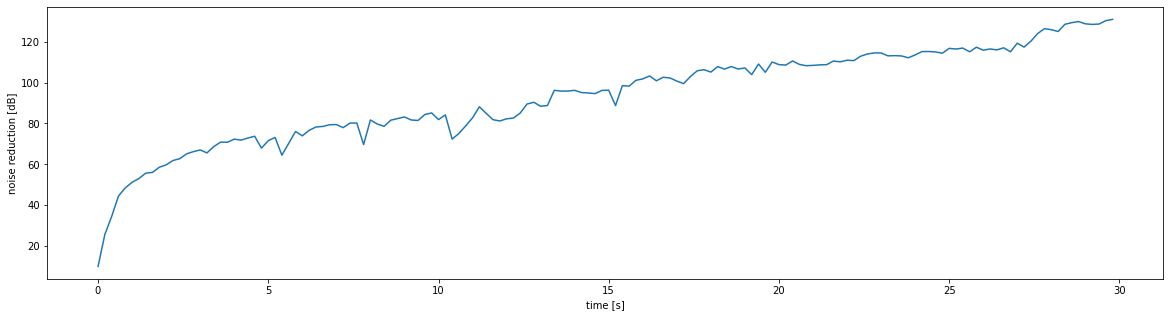

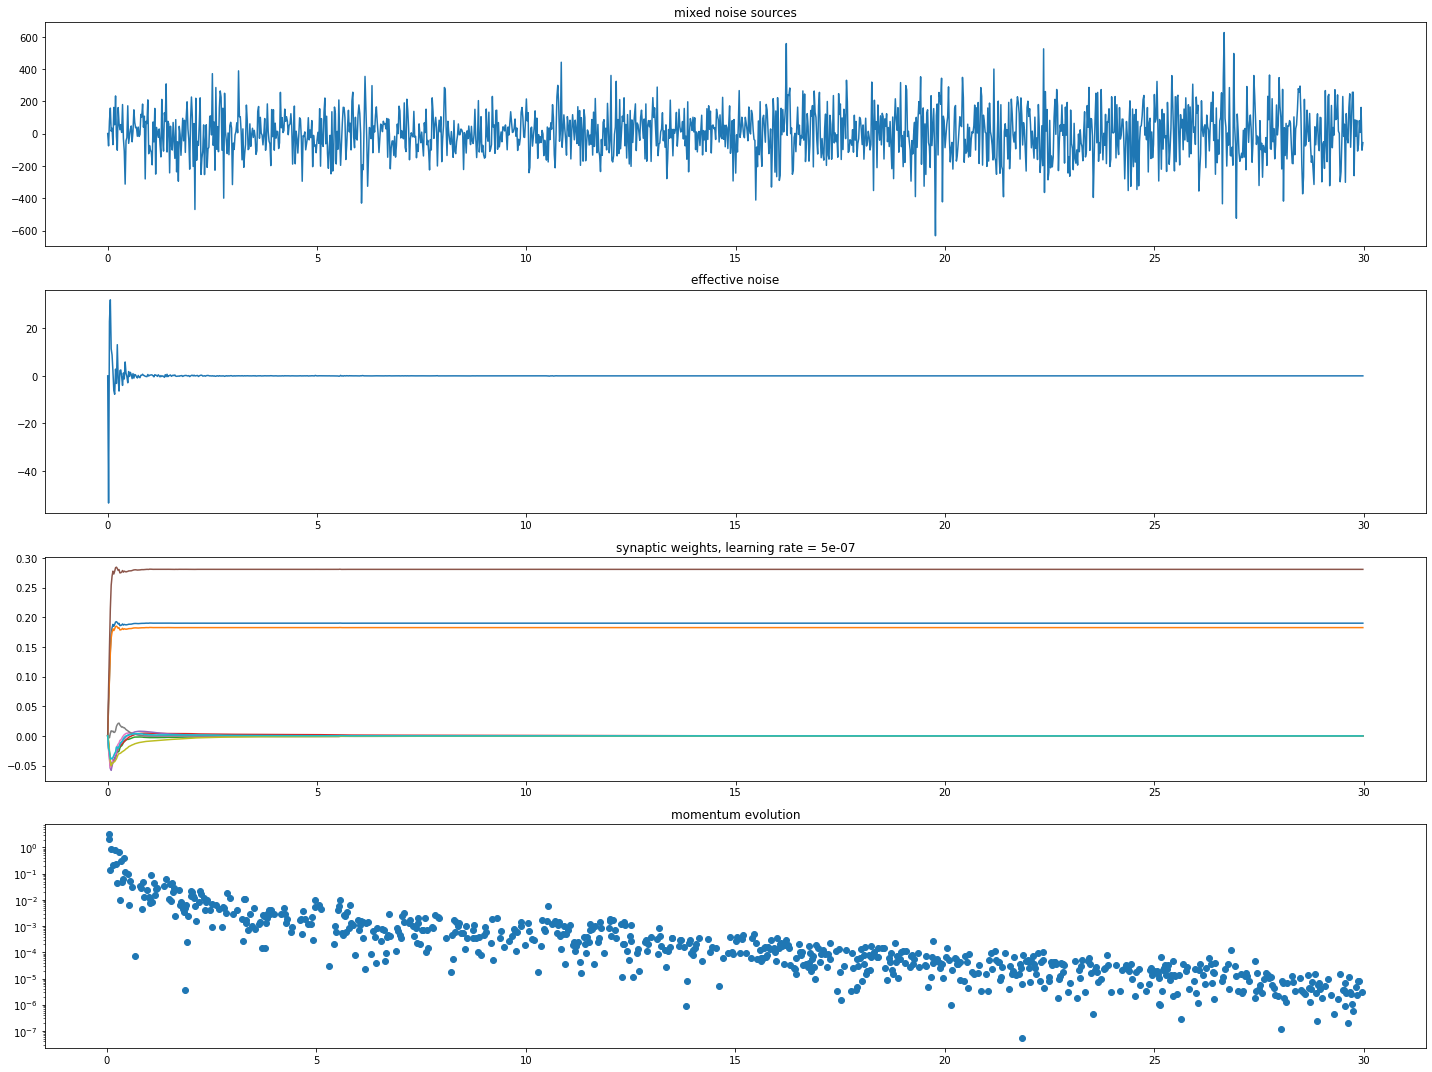

In [3]:
cutoff_freqs = [None] * 11
layout = np.random.rand(10,2) * 2 - np.array([1,1])
sources = np.array([[2,0]])
name = "random_microphone_placement"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=30, lr=5e-7, shielding=False, print_file=True, plot=True, verbose=True, name=name)

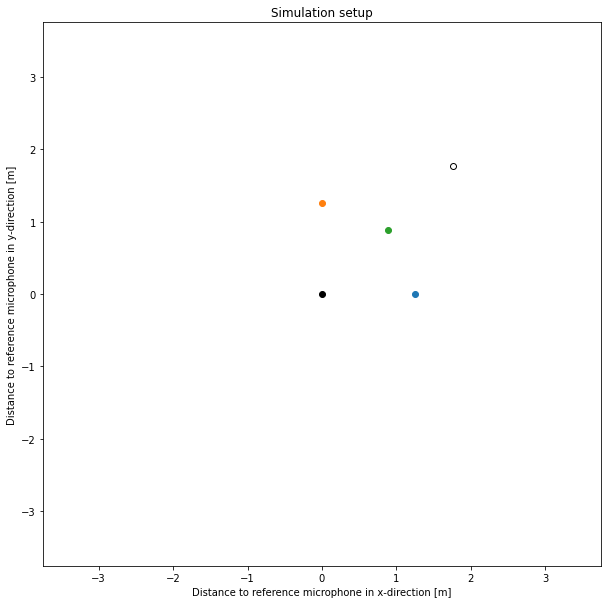

100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09


Sample delays:
 [[-46 -46 -88]]
Learned weights:
 [0.17662732 0.17662732 0.26027508]
Noise: 1.4210854715202004e-14
Mean noise reduction: 141.86314381279183


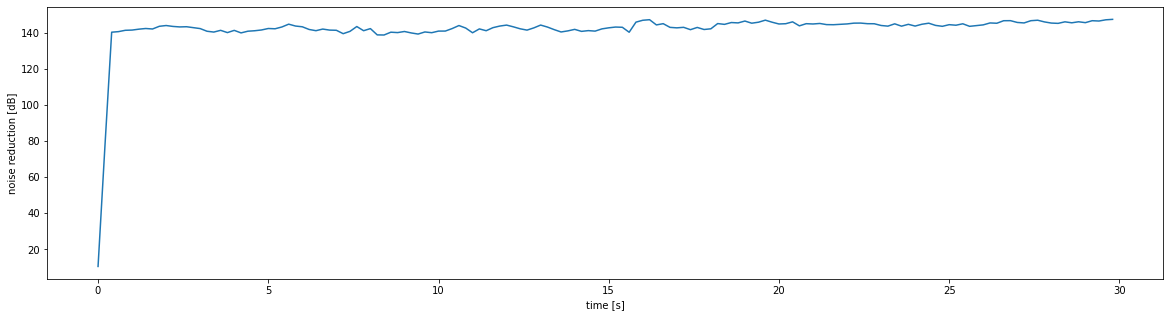

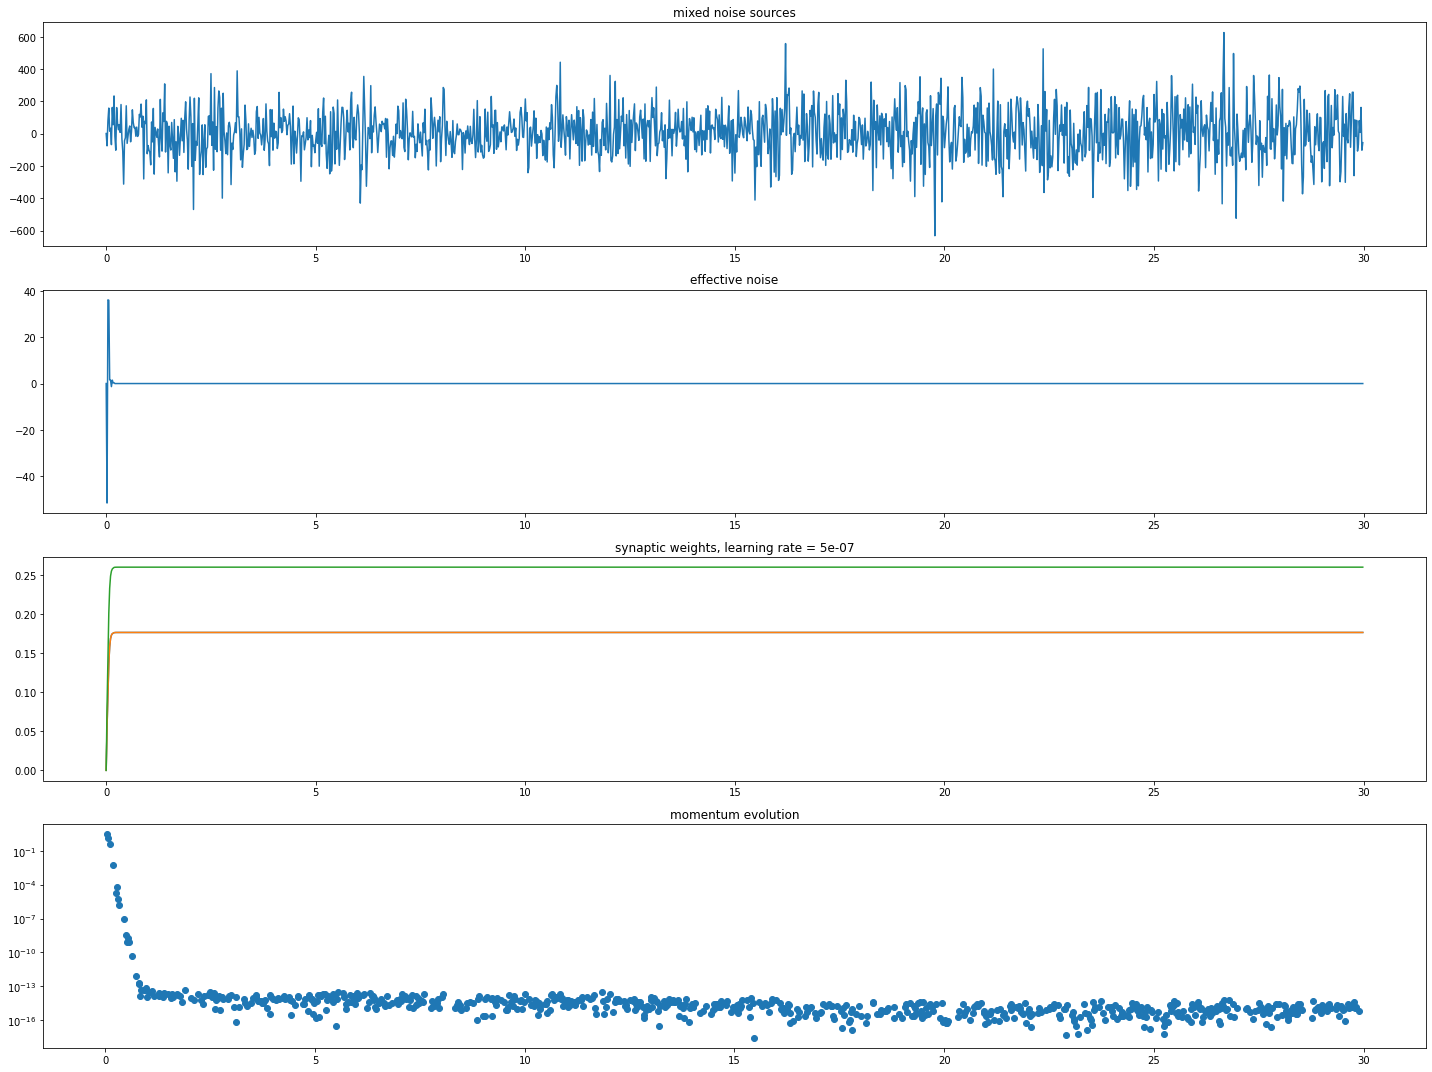

In [4]:
cutoff_freqs = [None] * 4
layout = np.array([[1,0], [0, 1], [0.707, 0.707]])
sources = np.array([[1.414,1.414]])
name = "quarter_circle"
results, audio, reference = ico_noise_cancellation(np.array([[1.414, 1.414]]), layout, inputs, scale, cutoff_freqs, T_max=30, lr=5e-7, shielding=False, print_file=True, plot=True, verbose=True, name=name)

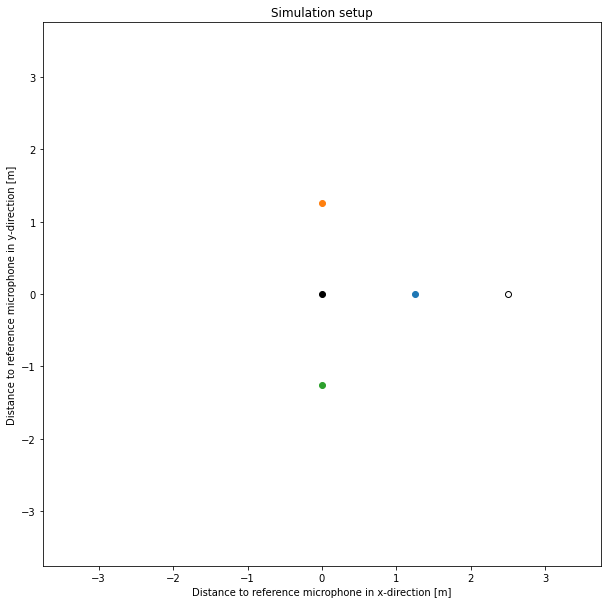

100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09


Sample delays:
 [[-88  21  21]]
Learned weights:
 [5.00000000e-01 2.00699185e-17 2.00699185e-17]
Noise: 2.2102928976493635e-14
Mean noise reduction: 139.92289074698334


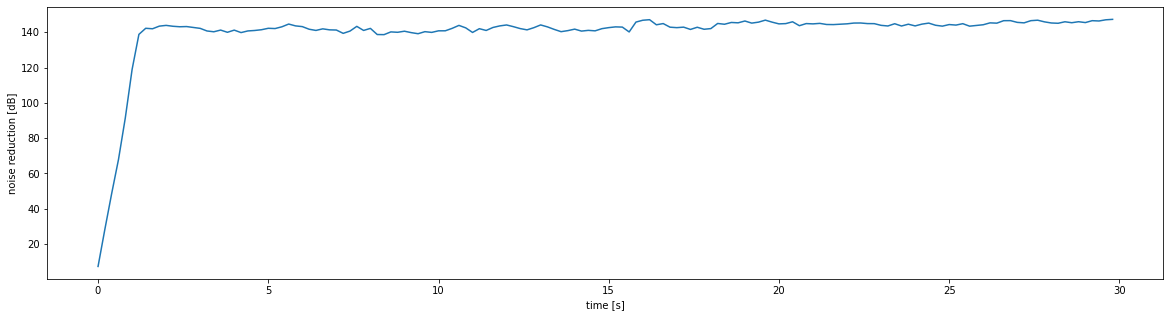

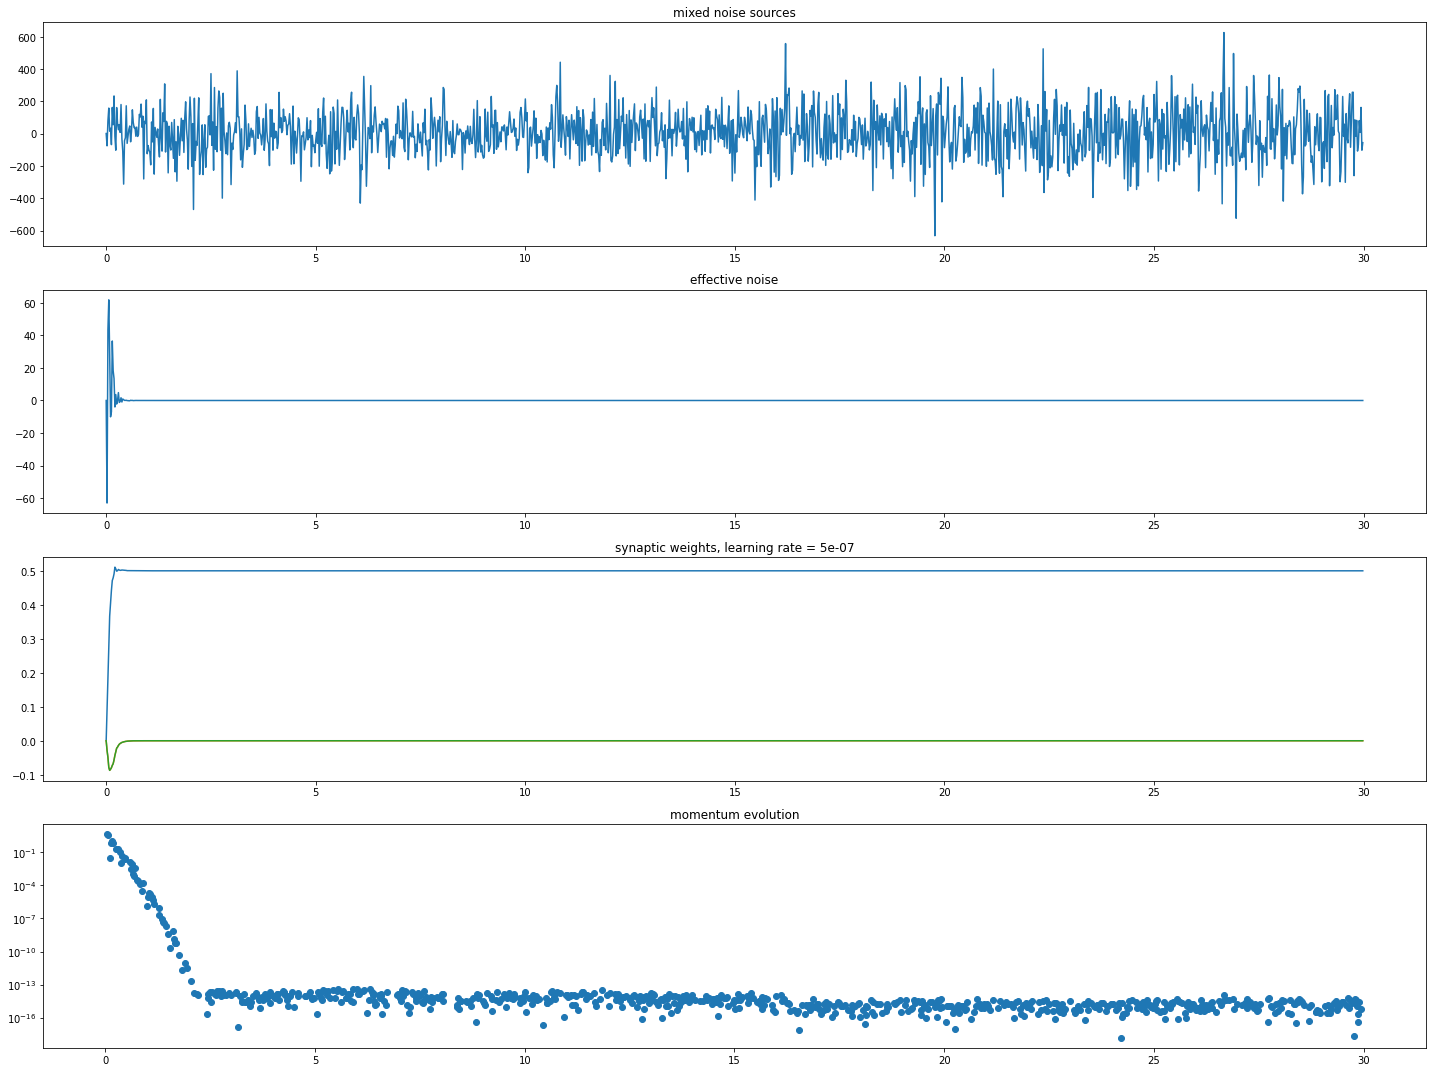

In [5]:
cutoff_freqs = [None] * 4
layout = np.array([[1,0], [0, 1], [0, -1]])
sources = np.array([[2,0]])
name = "half_circle"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=30, lr=5e-7, shielding=False, print_file=True, plot=True, verbose=True, name=name)

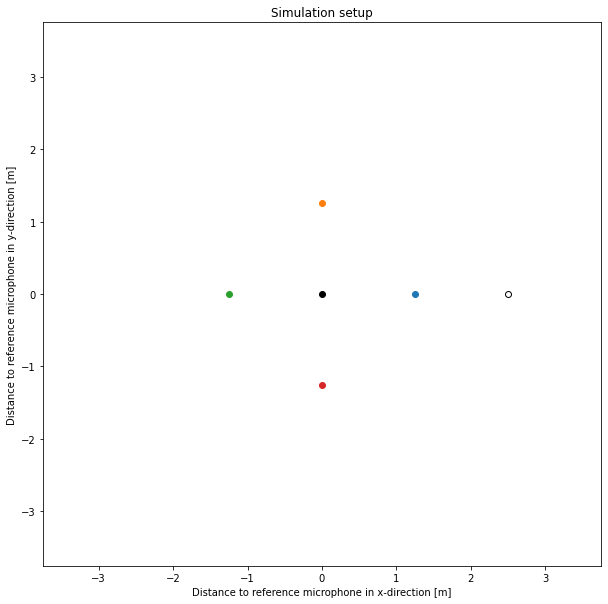

100% (719822 of 719822) |################| Elapsed Time: 0:00:11 Time:  0:00:11


Sample delays:
 [[-88  21  87  21]]
Learned weights:
 [5.00000000e-01 1.66807366e-17 4.00200508e-17 1.66807366e-17]
Noise: 5.315513290365682e-14
Mean noise reduction: 134.34748184327182


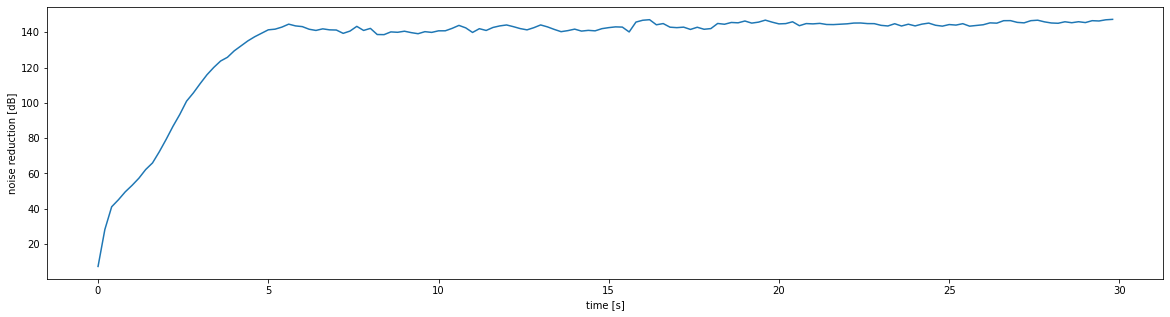

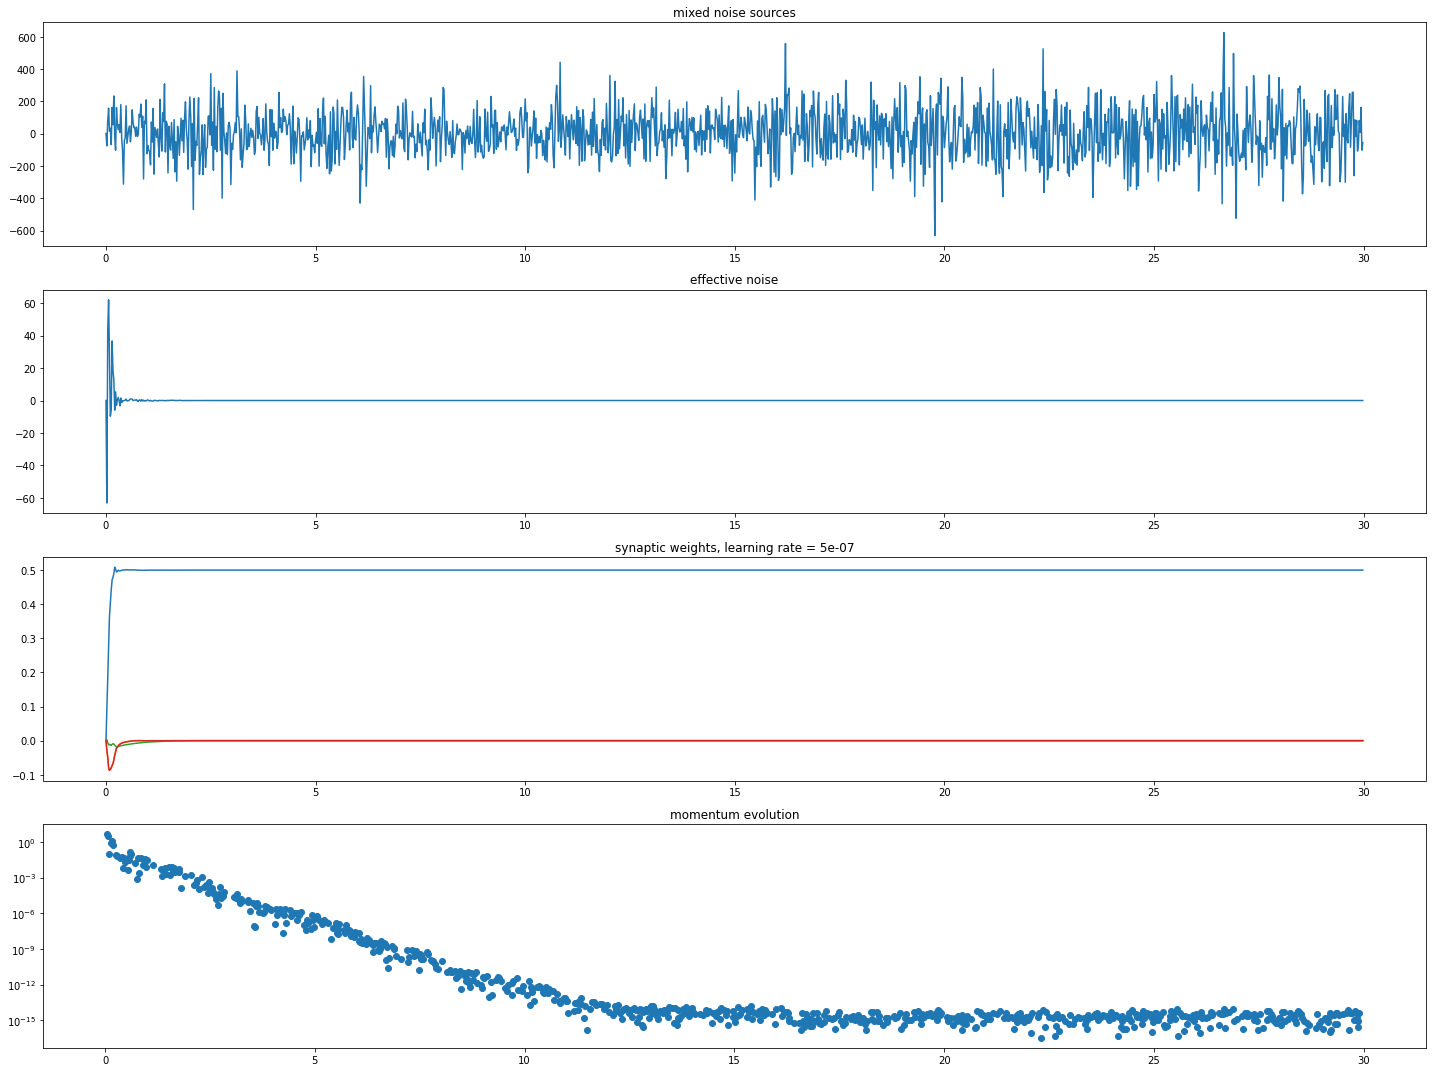

In [6]:
cutoff_freqs = [None] * 5
layout = np.array([[1,0], [0, 1], [-1, 0], [0, -1]])
sources = np.array([[2,0]])
name = "full_circle"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=30, lr=5e-7, shielding=False, print_file=True, plot=True, verbose=True, name=name)

In [7]:
s = 1.25
cutoff_freqs = [None] * 5
layout = np.array([[1,0], [0, 1], [-1, 0], [0, -1]])
sources = np.array([[2,0]])
res, labels = [], []
while s < 100:
    r, _, _ = ico_noise_cancellation(sources, layout, inputs, s, cutoff_freqs, T_max=30, lr=lr, shielding=False, print_file=False, plot=False, verbose=False)
    labels.append(s)
    res.append(r)
    s *= 2

100% (719822 of 719822) |################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (719648 of 719648) |################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (719298 of 719298) |################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (718600 of 718600) |################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (717198 of 717198) |################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (714400 of 714400) |################| Elapsed Time: 0:00:11 Time:  0:00:11
100% (708804 of 708804) |################| Elapsed Time: 0:00:11 Time:  0:00:11


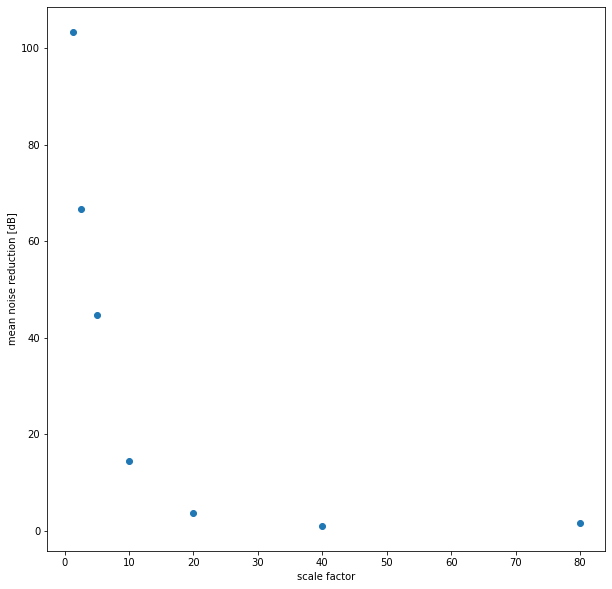

In [8]:
pl.figure(figsize=(10,10), facecolor='white')
pl.scatter(labels, np.mean(res, axis=1))
pl.xlabel("scale factor")
pl.ylabel("mean noise reduction [dB]")
pl.savefig("imgs/mean_noise_reduction_vs_scale_factor.png")
pl.savefig("imgs/mean_noise_reduction_vs_scale_factor.svg")
pl.show()

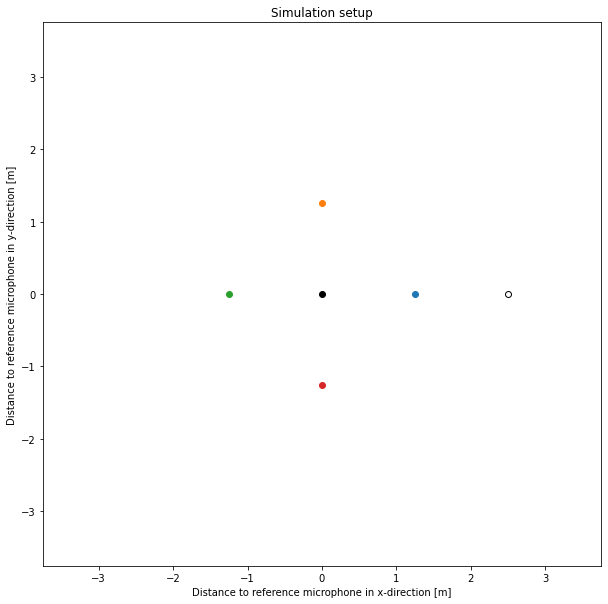

100% (719822 of 719822) |################| Elapsed Time: 0:00:12 Time:  0:00:12


Sample delays:
 [[-88  21  87  21]]
Learned weights:
 [ 5.00000000e-01  3.94742467e-01 -2.73609172e-16 -3.94742467e-01]
Noise: -1.5631940186722204e-13
Mean noise reduction: 129.35375709014158


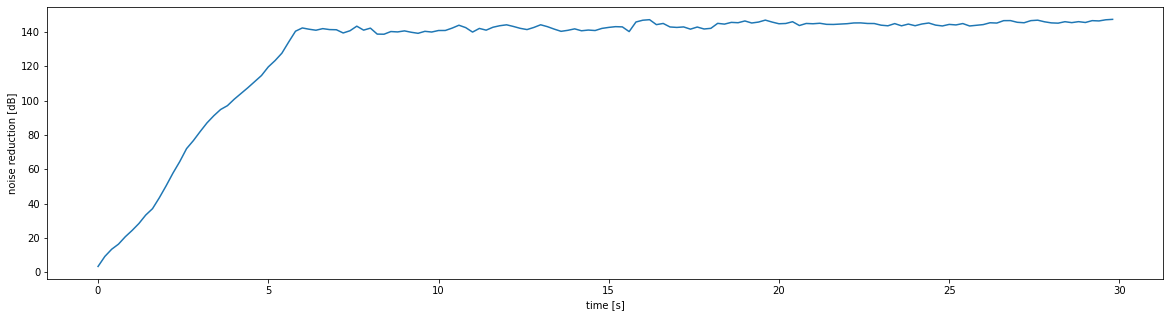

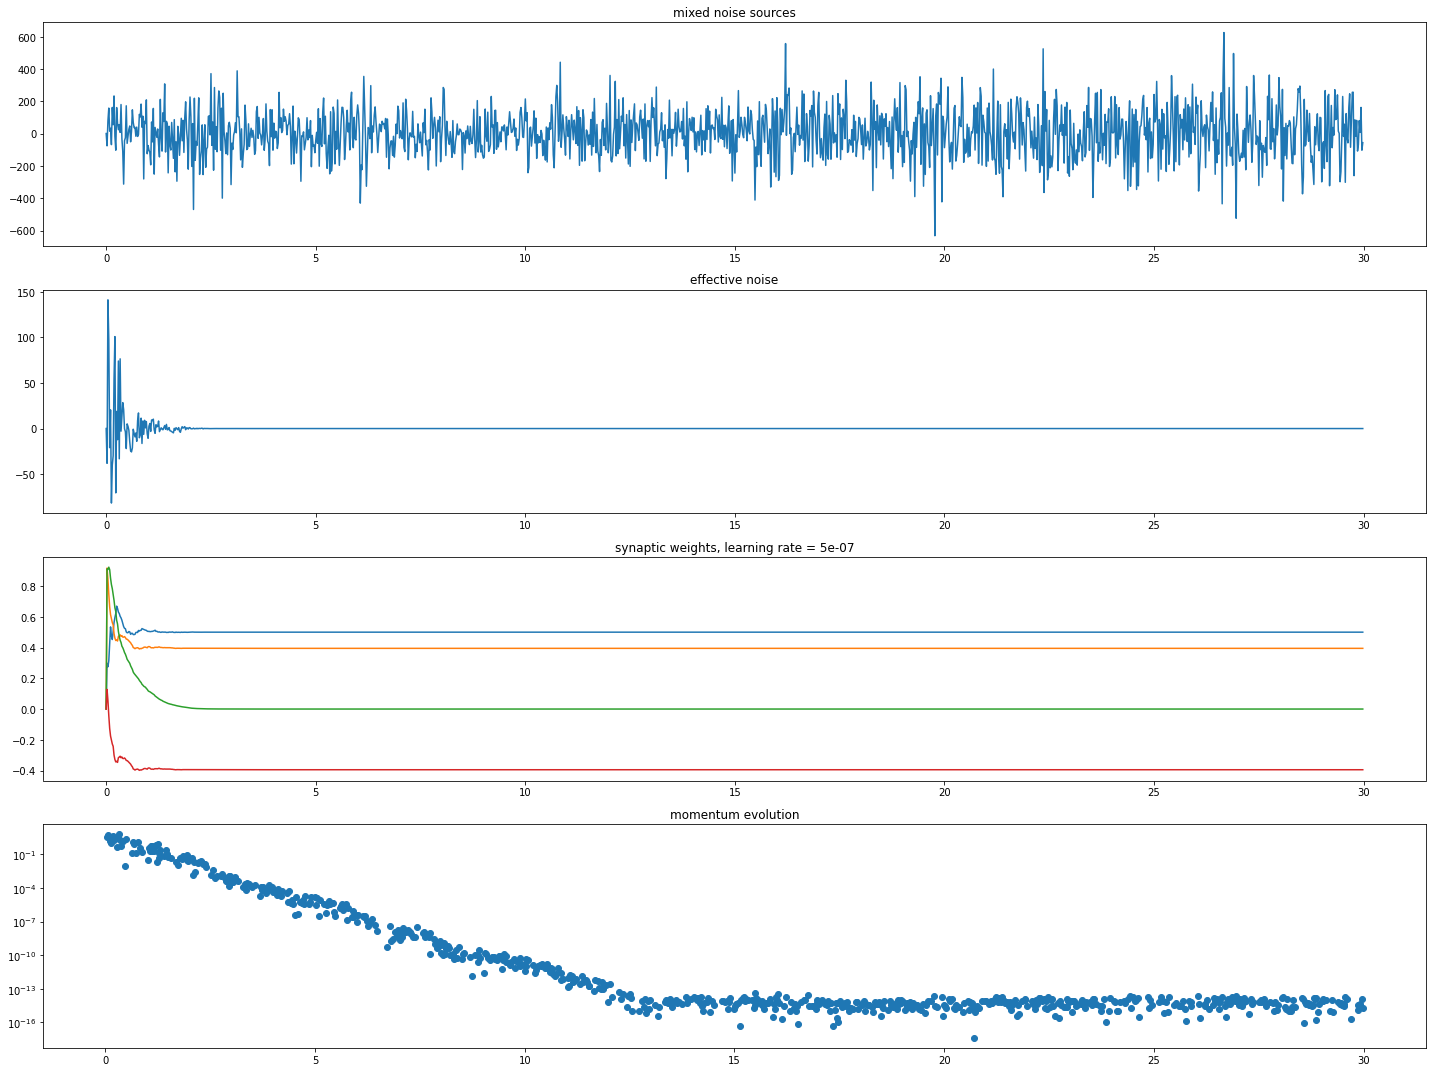

In [9]:
cutoff_freqs = [None] * 5
layout = np.array([[1,0], [0, 1], [-1, 0], [0, -1]])
sources = np.array([[2,0]])
name = "random_weight_init"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=30, lr=5e-7, shielding=False, print_file=True, plot=True, verbose=True, rand=True, name=name)

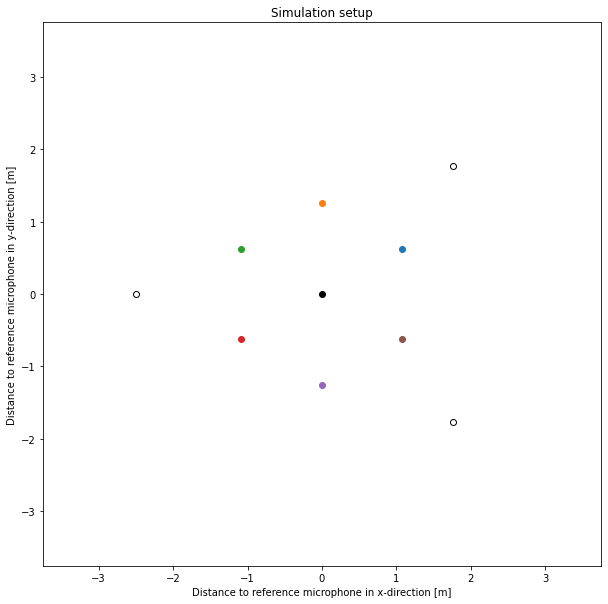

100% (719834 of 719834) |################| Elapsed Time: 0:00:14 Time:  0:00:14


Sample delays:
 [[-82 -46  40  85  70  -1]
 [ 79  21 -67 -67  21  79]
 [ -1  70  85  40 -46 -82]]
Learned weights:
 [3.90996787e-10 7.36791660e-01 3.09828419e-01 3.09828419e-01
 7.36791630e-01 1.77073204e-08]
Noise: 5.750579189616809e-06
Mean noise reduction: 77.44190359583605


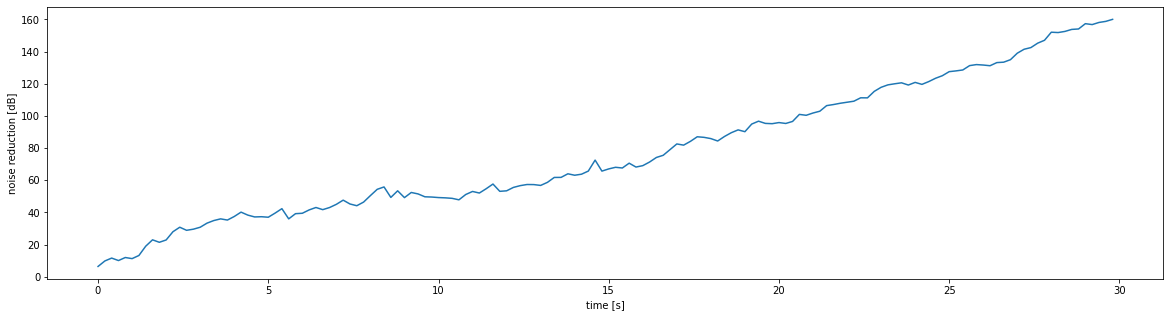

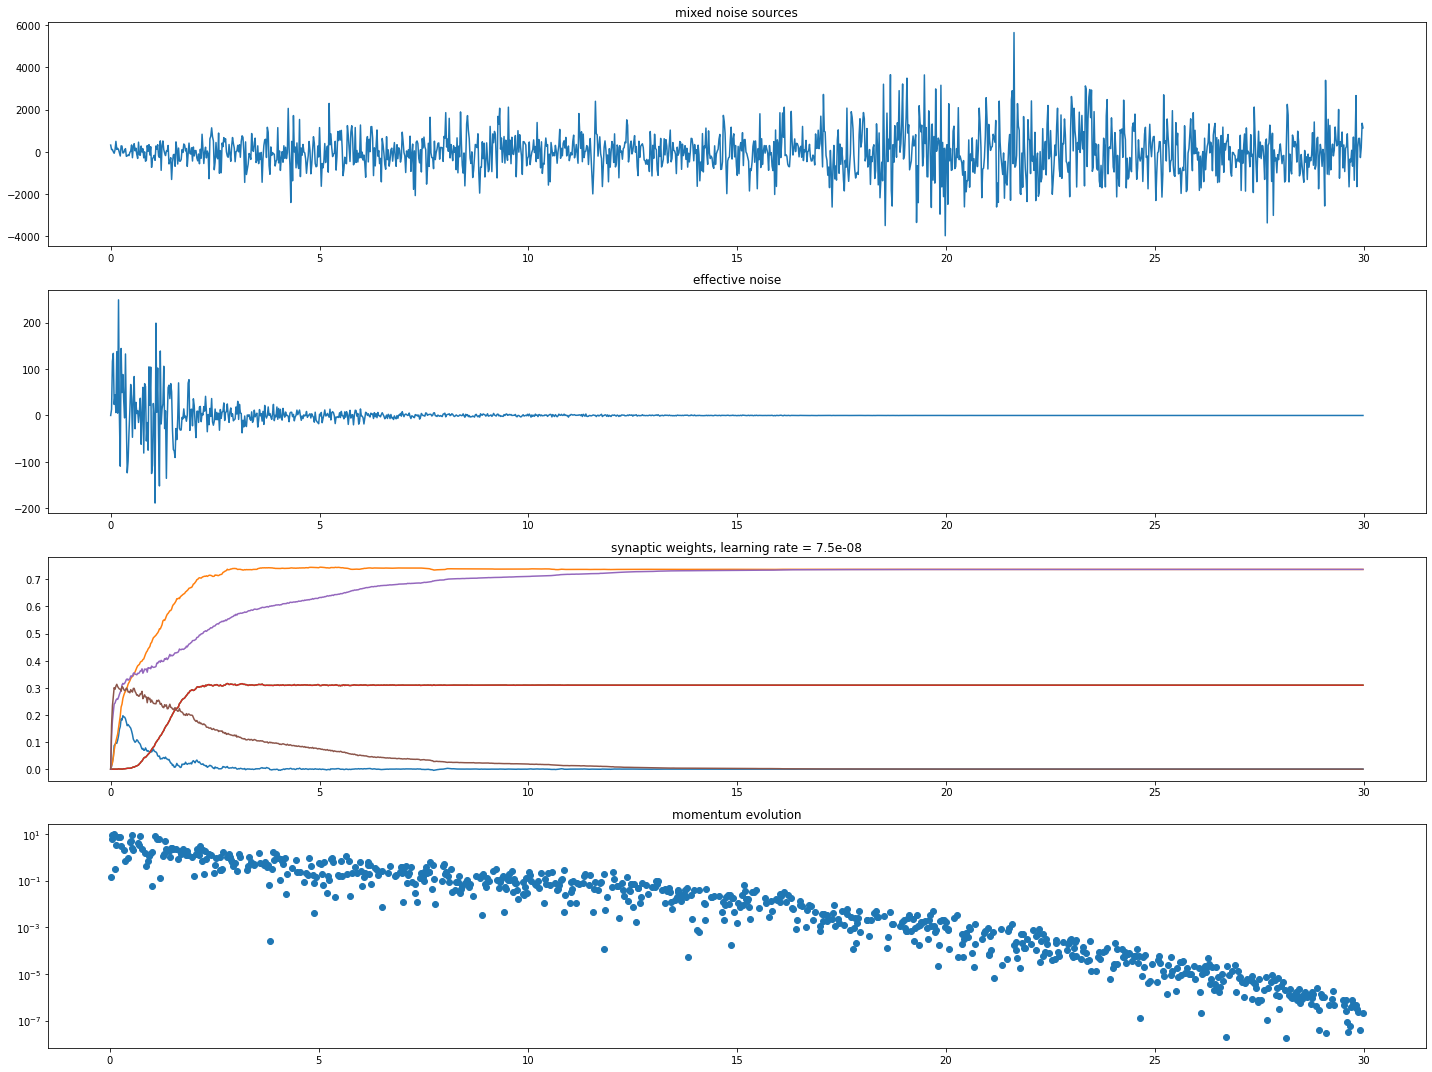

In [10]:
T_max = 30
lr = 7.5e-8
inputs = ["firetruck.mp3", "mall.mp3", "london.mp3"]
sources = np.array([[1.414,1.414], [-2,0], [1.414, -1.414]])
cutoff_freqs = [None] * 7
name = "multiple_sources_shielded"

N = 6
offset = 30
layout = np.empty((N, 2))
for i in range(N):
    theta = (i/N)*360+offset
    layout[i] = np.array([np.cos(theta*np.pi/180), np.sin(theta*np.pi/180)])
    
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=T_max, lr=lr, shielding=True, print_file=True, plot=True, verbose=True, name=name)

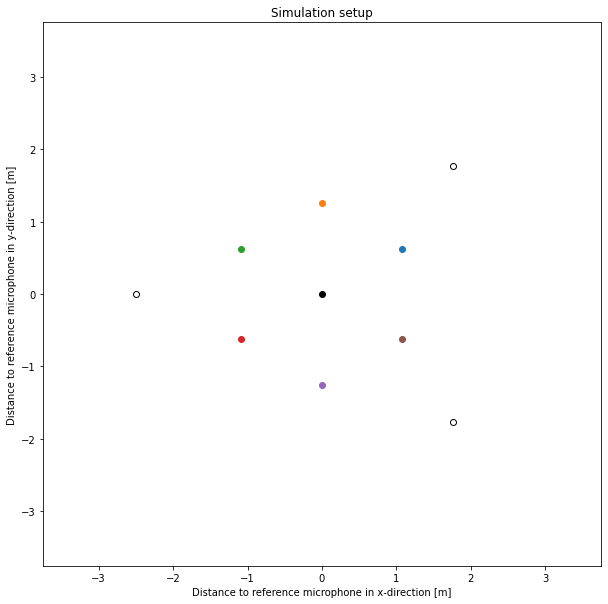

100% (719834 of 719834) |################| Elapsed Time: 0:00:13 Time:  0:00:13


Sample delays:
 [[-82 -46  40  85  70  -1]
 [ 79  21 -67 -67  21  79]
 [ -1  70  85  40 -46 -82]]
Learned weights:
 [ 0.07423913  0.07418616  0.19267324  0.05780769 -0.08728216  0.61844393]
Noise: 609.3926869322792
Mean noise reduction: 9.040655080925022


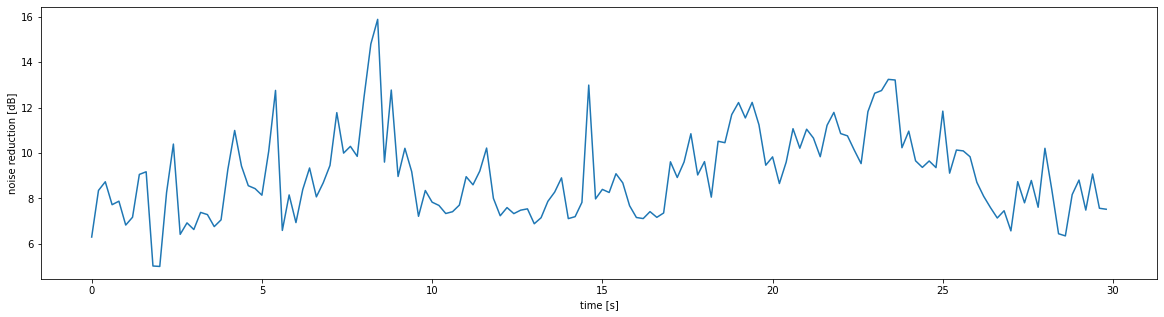

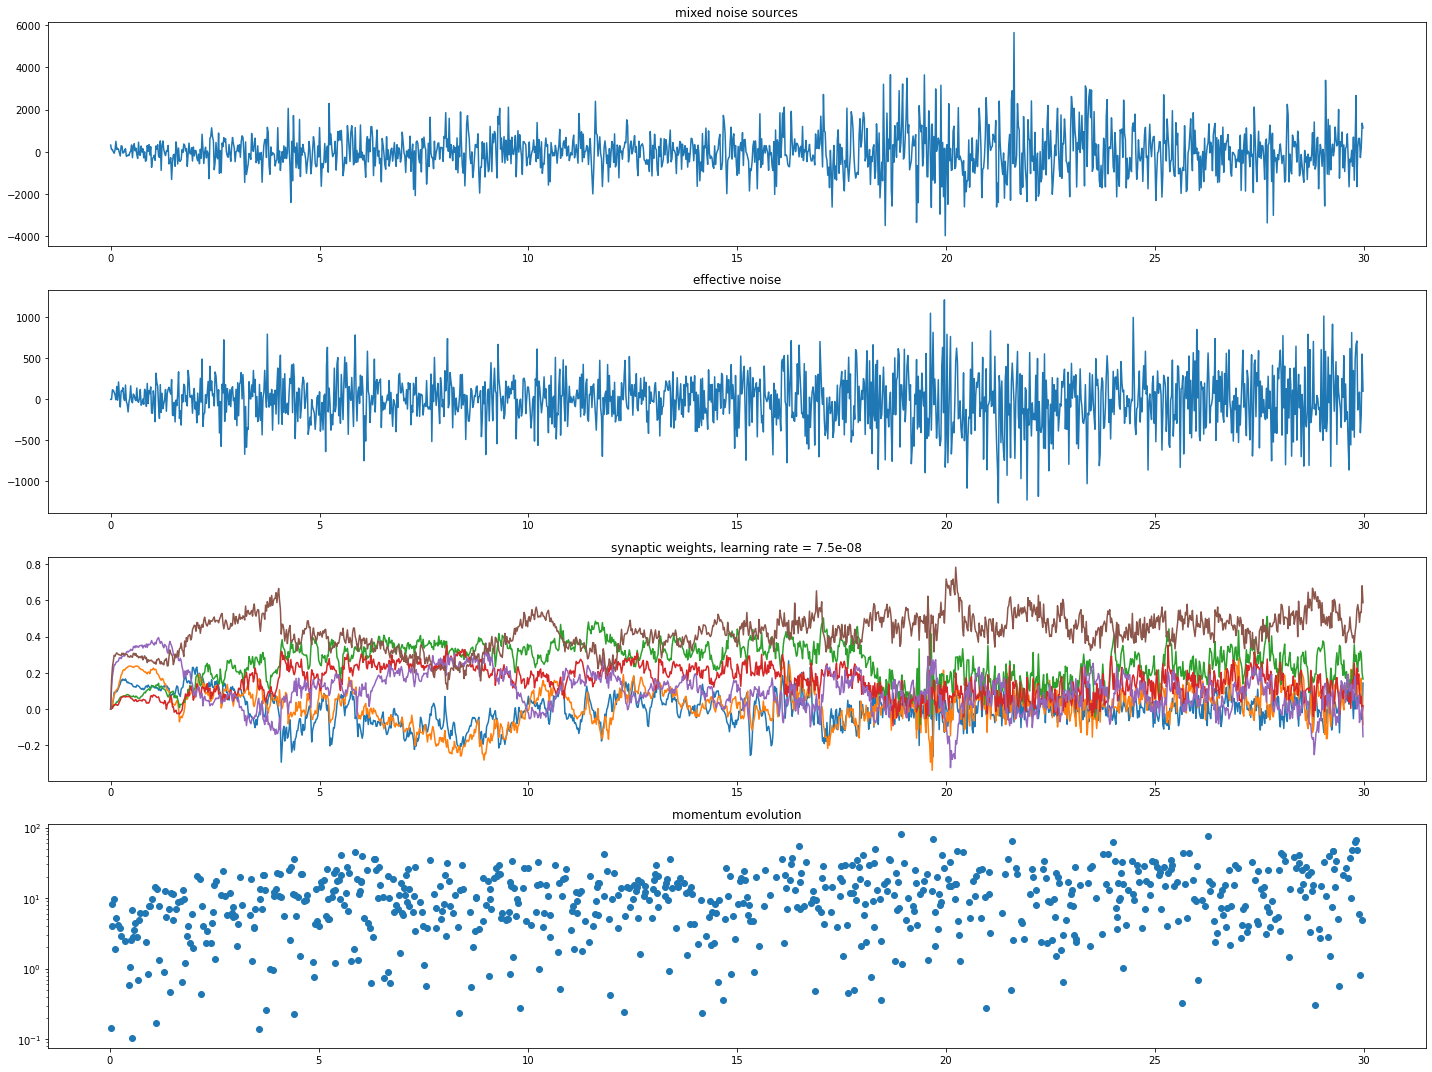

In [11]:
name = "multiple_sources_unshielded"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, T_max=T_max, lr=lr, shielding=False, print_file=True, plot=True, verbose=True, name=name)

In [12]:
s = 1.25
res, labels = [], []
while s < 100:
    r, _, _ = ico_noise_cancellation(sources, layout, inputs, s, cutoff_freqs, T_max=30, lr=lr, shielding=True, print_file=False, plot=False, verbose=False)
    labels.append(s)
    res.append(r)
    s *= 2

100% (719834 of 719834) |################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (719670 of 719670) |################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (719344 of 719344) |################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (718692 of 718692) |################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (717384 of 717384) |################| Elapsed Time: 0:00:14 Time:  0:00:14
100% (714770 of 714770) |################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (709540 of 709540) |################| Elapsed Time: 0:00:12 Time:  0:00:12


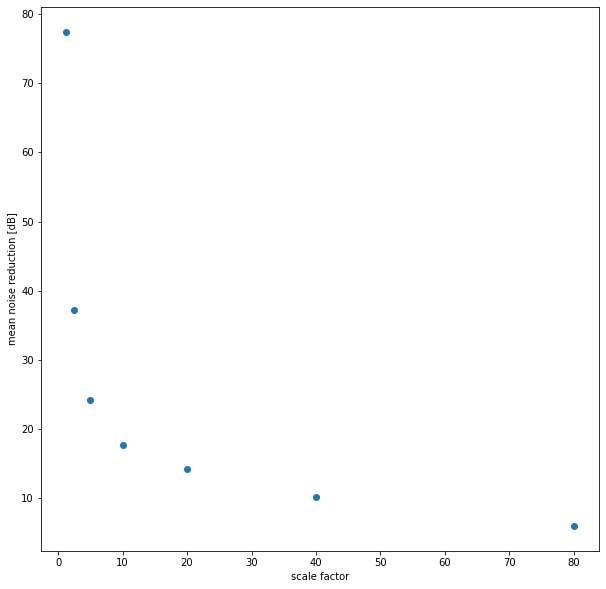

In [13]:
pl.figure(figsize=(10,10), facecolor='white')
pl.scatter(labels, np.mean(res, axis=1))
pl.xlabel("scale factor")
pl.ylabel("mean noise reduction [dB]")
pl.savefig("imgs/mean_noise_reduction_vs_scale_factor_multiple_sources.png")
pl.savefig("imgs/mean_noise_reduction_vs_scale_factor_multiple_sources.svg")
pl.show()